0          0
1          1
2          2
3          3
4          4
        ... 
8425    8425
8426    8426
8427    8427
8428    8428
8429    8429
Name: x, Length: 8430, dtype: int64


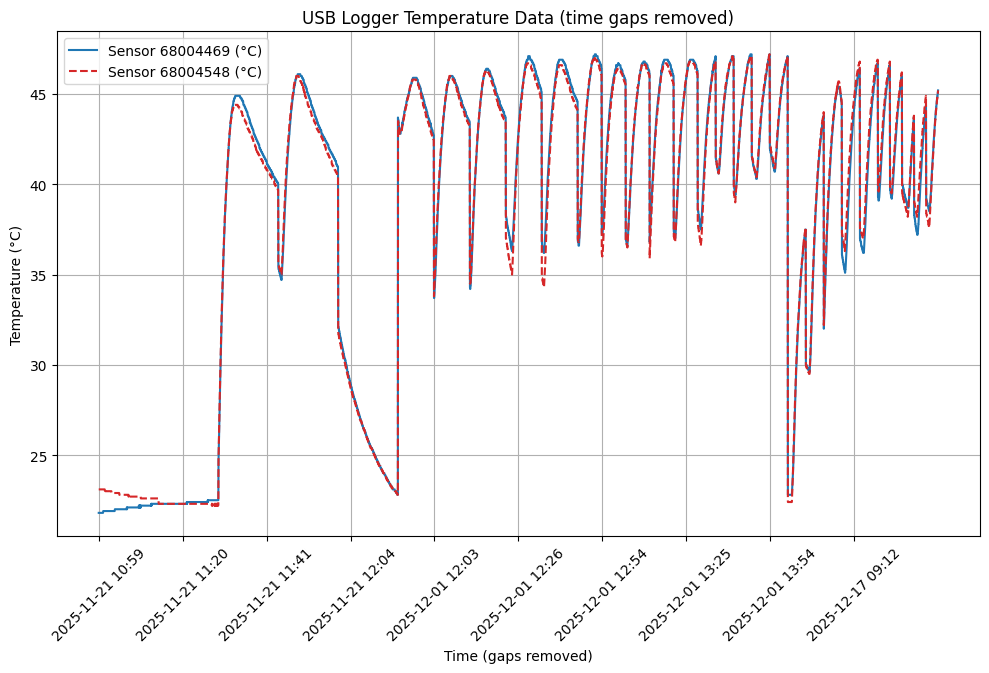

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

set_machine = 'OCEAN'

# folderpath machine output data
folder_path_machine_output = f'output/{set_machine}'

# plot usb logger data
data_usb_logger = pd.read_csv(f'{folder_path_machine_output}/data_usb_logger.csv')

# Time in datetime umwandeln
data_usb_logger["Time"] = pd.to_datetime(
    data_usb_logger["Time"],
    format="%Y-%m-%d %H:%M:%S"
)

# continuese x axis without gaps
data_usb_logger["x"] = range(len(data_usb_logger))

plt.figure(figsize=(10, 6))

plt.plot(
    data_usb_logger["x"],
    data_usb_logger["Sensor_68004469"],
    label="Sensor 68004469 (°C)",
    color="tab:blue"
)
plt.plot(
    data_usb_logger["x"],
    data_usb_logger["Sensor_68004548"],
    label="Sensor 68004548 (°C)",
    linestyle="--",
    color="tab:red"
)

plt.xlabel("Time (gaps removed)")
plt.ylabel("Temperature (°C)")
plt.title("USB Logger Temperature Data (time gaps removed)")
plt.grid()
plt.legend()
plt.tight_layout()

# Set x-ticks to show time labels at regular intervals
tick_idx = data_usb_logger["x"][::len(data_usb_logger)//10]
tick_labels = data_usb_logger["Time"].dt.strftime("%Y-%m-%d %H:%M")[::len(data_usb_logger)//10]

plt.xticks(tick_idx, tick_labels, rotation=45)

plt.show()
